## Name: Sanchit Kripalani <br> Batch: M1 <br> Roll No: 31145

### Problem Statement:

**Data Analytics II**

1. implement Logistic Regression using python/R to perform classification on Social_Network_Ads
2. Compute Confusion matrix to find TP, FP, TN, FN, Acuracy, Error rate, Precision, Recall, on the given dataset.

In [182]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [183]:
# Load the dataset 
raw_data = pd.read_csv('Datasets/Social_Network_Ads.csv')

In [184]:
# Use .head() to get the first 5 entires
raw_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [185]:
# Use .info() to get the summary of the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Data Preprocessing

In [186]:
# Check for Null values
raw_data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [187]:
# Get the type of variable for each column by finding out unique values
uni_gen = raw_data['Gender'].unique().size
uni_age = raw_data['Age'].unique().size
uni_salary = raw_data['EstimatedSalary'].unique().size
uni_purchased = raw_data['Purchased'].unique().size

print(f'The number of unique entries in Gender is: {uni_gen}')
print(f'The number of unique entries in Age is: {uni_age}')
print(f'The number of unique entries in Salary is: {uni_salary}')
print(f'The number of unique entries in Purchased is: {uni_purchased}')

The number of unique entries in Gender is: 2
The number of unique entries in Age is: 43
The number of unique entries in Salary is: 117
The number of unique entries in Purchased is: 2


In [188]:
# Get the mean of all columns which is important in regression calculations
gender_mean = 0.5 # (Aprrox as Male and Female are 1, 0 resp)
age_mean = raw_data['Age'].mean()
salary_mean = raw_data['EstimatedSalary'].mean()

print(f'The mean value of Gender data is: {gender_mean}')
print(f'The mean value of Age data is: {age_mean}')
print(f'The mean value of Salary data is: {salary_mean}')

The mean value of Gender data is: 0.5
The mean value of Age data is: 37.655
The mean value of Salary data is: 69742.5


**Observations**

Since there a large discrepancy in the mean of the columns, it would be advisable to perform some sort of normalization technique in order to improve the Logistic Model accuracy.

In [189]:
# Get the data type of each column/attribute
raw_data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

Thus it can be concluded that Purchased and Gender are Nominal Categorical data types.

In [190]:
# We can plot a pie chart to see the number of categorical entries in the dataset
def plot_pie():
    pie_explode = [0, 0.1]
    
    pie_y_gender = raw_data['Gender'].value_counts()
    pie_y_purchased = raw_data['Purchased'].value_counts()
    
    pie_gender_label = ['Female', 'Male']
    pie_purchased_label = ['Not Purchased', 'Purchased']

    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    
    axes[0].pie(pie_y_gender, labels=pie_gender_label, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 14})
    axes[1].pie(pie_y_purchased, labels=pie_purchased_label, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 14})
    plt.show()

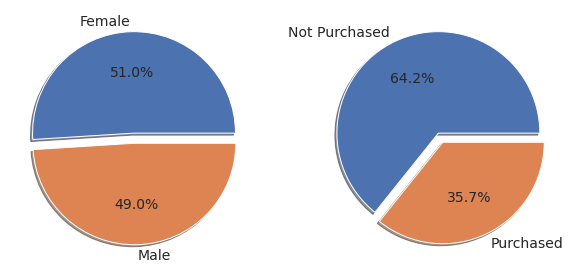

In [191]:
plot_pie()

**Observations**

- The sample data consists of almost equal number of males and females, which ensures that we get an accurate gender based prediction.

- However, since almost 64% of the data that we have is of the customers that did not purchase, our model will be biased towards predicting that a random user will not purchase. 

- The model that we train is heavily influenced by the data that we have. To ensure that the model does not become biased to making a prediction, we must ensure that the train and test data has equal amount of purchased and not purchased examples.

- We will be using stratification to ensure that our model does not generate overfitting.

In [192]:
# Since the Gender is binary data, we will have to encode it
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

raw_data['Gender'] = encoder.fit_transform(raw_data['Gender'])

In [193]:
# The Gender male has now been converted to 1 and female to 0
raw_data['Gender'].head()

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int64

### Model Creation

In [194]:
# Drop the unnecessary column
raw_data.drop(columns=['User ID'], axis=1, inplace=True)

raw_data.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [195]:
# Separate the dependent and independent variables/columns
X = raw_data.drop('Purchased', axis=1)
y = raw_data['Purchased']

print(X.shape)
print(y.shape)

(400, 3)
(400,)


Thus, we have 3 independent and 1 independent variables.

### Training without Stratification

**Note:** Training without stratification means that we will split the train test data randomly. We are not concerned about whether the training data gets more amount of not purchased or purchased data.

In [196]:
# Apply train test split to divide the data into testing and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [197]:
print('The shape of X_train is: ', X_train.shape)
print('The shape of X_test is: ', X_test.shape)
print('The shape of y_train is: ', y_train.shape)
print('The shape of y_test is: ', y_test.shape)

The shape of X_train is:  (300, 3)
The shape of X_test is:  (100, 3)
The shape of y_train is:  (300,)
The shape of y_test is:  (100,)


In [198]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [199]:
# Print the scaled data
print(X_train[:3])
print(X_test[:3])

[[0.         0.61904762 0.17777778]
 [1.         0.33333333 0.77777778]
 [0.         0.47619048 0.25925926]]
[[1.         0.28571429 0.53333333]
 [0.         0.47619048 0.25925926]
 [1.         0.4047619  0.44444444]]


In [200]:
# Create a logistic regression model using sklearn library
from sklearn.linear_model import LogisticRegression

# Create the model and fit the training data
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [201]:
# Predict the results on testing data
y_preds = model.predict(X_test)

### Analysizing the predictions

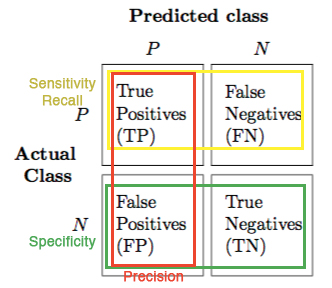

**Note: The above is an example of what a confusion matrix looks like.**

The important statistical data inferred with the help of confusion matrix are: 

- Sensitivity: The model's ability of to correctly identify true positives

- Specificity: The model's ability of to correctly identify true negatives

In [202]:
# Create a function to plot the confusion matrix
from sklearn.metrics import confusion_matrix

def plot_confusion(test_y, prediction):
    confusion_labels = np.array([['True Neg.', 'False Pos.'], ['False Neg.', 'True Pos.']])
    
    cm = confusion_matrix(test_y, prediction)

    df_cm = pd.DataFrame(cm, range(2), range(2))

    plt.figure(figsize=(8,8))

    sns.set(font_scale=1.4) # for label size

    labels = (np.asarray(["{0}\n\n{1}".format(string, value)
                          for string, value in zip(confusion_labels.flatten(),
                                                   cm.flatten())])
             ).reshape(2,2)

    ax = sns.heatmap(df_cm, annot=labels, annot_kws={"size": 16}, fmt='', cbar=False) # font size
    
    
    # Confusion Matrix Labels
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])
    
    plt.title("Confusion Matrix", fontdict={'fontsize':16})
    plt.show()
    
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    
    #Print Important Statistical terms
    Specificity = (TN) / (TN + FP)
    print("\nSpecificity is: {0:.2f}%".format(Specificity*100))

    Sensitivity = (TP) / (TP + FN)
    print("Sensitivity/Recall is: {0:.2f}%".format(Sensitivity*100))
    
    Accuracy = (TP+TN) / (TP+TN+FP+FN)
    print("Accuracy is: {0:.2f}%".format(Accuracy*100))
    
    error = (FP+FN) / (TP+TN+FP+FN)
    print("Error Rate is: {0:.2f}%".format(error*100))
    
    precision = (TP) / (TP+FP)
    print('Precision is: {0:.2f}%'.format(precision*100))

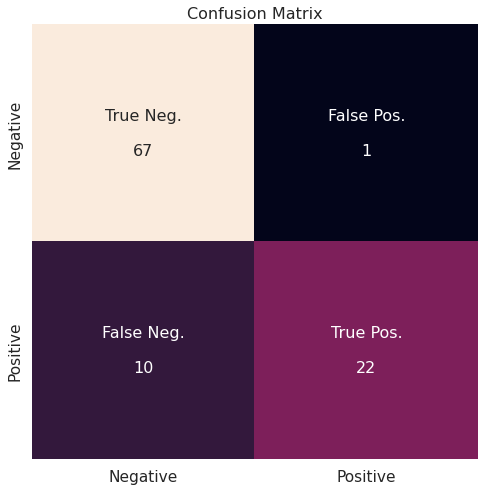


Specificity is: 98.53%
Sensitivity/Recall is: 68.75%
Accuracy is: 89.00%
Error Rate is: 11.00%
Precision is: 95.65%


In [203]:
plot_confusion(y_test, y_preds)

**Observations**

- The model gives a very good accuracy of 89%.
- The Specificity is 98%, which means that we can surely tell which customers won't be buying products.
- The Sensitivity is 68%, which is really poor. This would mean that identifying customers who will buy a product is particularly hard.

### Training with Stratification 

**Note:** Training with stratification means that we will split the train test data according the percent of purchased and not purchased data. This means that we are concerned about preserving the ratio of purchased and not purchased samples in the training set. This means that the training set will get 64.5% not purchased and 35.5 purchased values, same as that of the entire dataset.

In [204]:
# Apply train test split to divide the data into testing and training data
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, stratify=y)

In [205]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

X_train2 = min_max_scaler.fit_transform(X_train2)
X_test2 = min_max_scaler.transform(X_test2)

In [206]:
# Create a logistic regression model using sklearn library
from sklearn.linear_model import LogisticRegression

# Create the model and fit the training data
model2 = LogisticRegression(random_state=0, penalty='l2')
model2.fit(X_train2, y_train2)

LogisticRegression(random_state=0)

In [207]:
# Predict the results on testing data
y_preds2 = model.predict(X_test2)

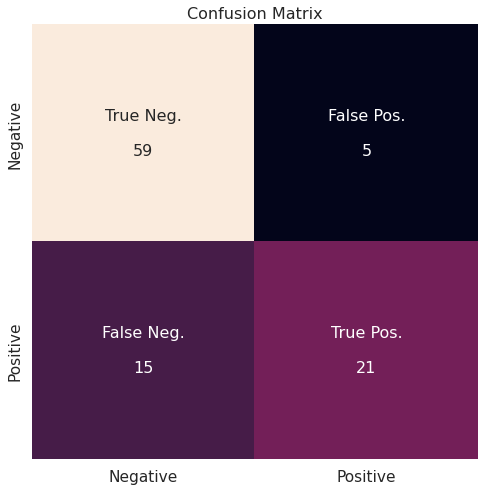


Specificity is: 92.19%
Sensitivity/Recall is: 58.33%
Accuracy is: 80.00%
Error Rate is: 20.00%
Precision is: 80.77%


In [208]:
plot_confusion(y_test2, y_preds2)

**Observations**

Overall, the performance of stratified data is poor. Data without stratification gave more accurate results.